In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
plt.style.use('seaborn-whitegrid')

# Artificial dataset

In [2]:
RF_importance = pd.read_csv('RF_importance.csv')
RF_importance.columns = ['variable', 'RF_importance']
RF_importance = RF_importance.sort_values('RF_importance', ascending = False)
RF_importance = RF_importance.set_index('variable')
RF_importance['order_RF_importance'] = pd.Series(range(1, RF_importance.shape[0]+1), index = RF_importance.index)

In [3]:
MCFS_importance = pd.read_csv('MCFS_importance.csv')
MCFS_importance.columns = ['variable', 'MCFS_importance']
MCFS_importance = MCFS_importance.set_index('variable')
MCFS_importance['order_MCFS'] = pd.Series(range(1, MCFS_importance.shape[0]+1), index = MCFS_importance.index)

In [4]:
Boruta_importance = pd.read_csv('Boruta_importance.csv')
Boruta_importance.columns = ['variable', 'Boruta_importance']
Boruta_importance = Boruta_importance.sort_values('Boruta_importance', ascending = False)
Boruta_importance = Boruta_importance.set_index('variable')
Boruta_importance['order_Boruta'] = pd.Series(range(1, Boruta_importance.shape[0]+1), index = Boruta_importance.index)

In [5]:
Univariate_selection = pd.read_csv('Univariate_selection.csv')
Univariate_selection['variable'] = Univariate_selection['variable'].apply(lambda x: 'V'+str(x))
Univariate_selection = Univariate_selection.sort_values('Univariate_selection', ascending = False)
Univariate_selection = Univariate_selection.iloc[:, [1,2]]
Univariate_selection = Univariate_selection.set_index('variable')
Univariate_selection['order_Univariate'] = pd.Series(range(1, Univariate_selection.shape[0]+1), index = Univariate_selection.index)

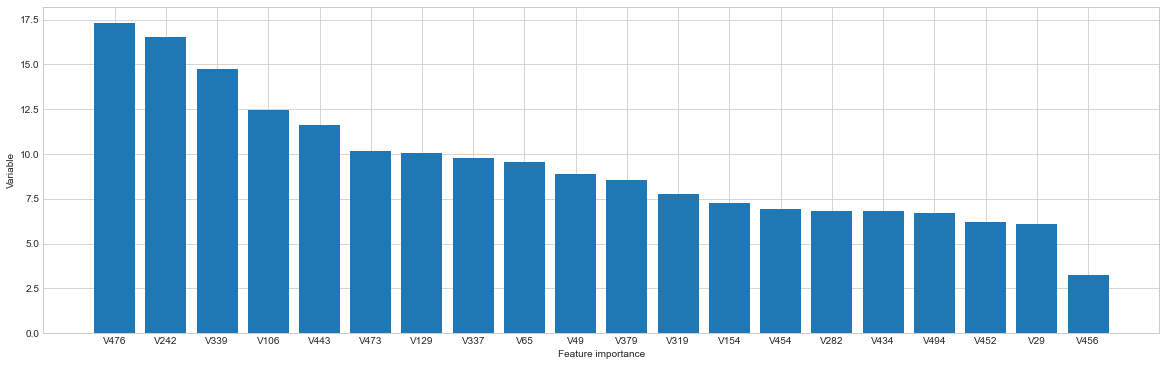

In [6]:
figure(figsize=(20, 6))
plt.bar(x = RF_importance.index, height = RF_importance['RF_importance'])
plt.ylabel('Variable')
plt.xlabel('Feature importance')

plt.show()

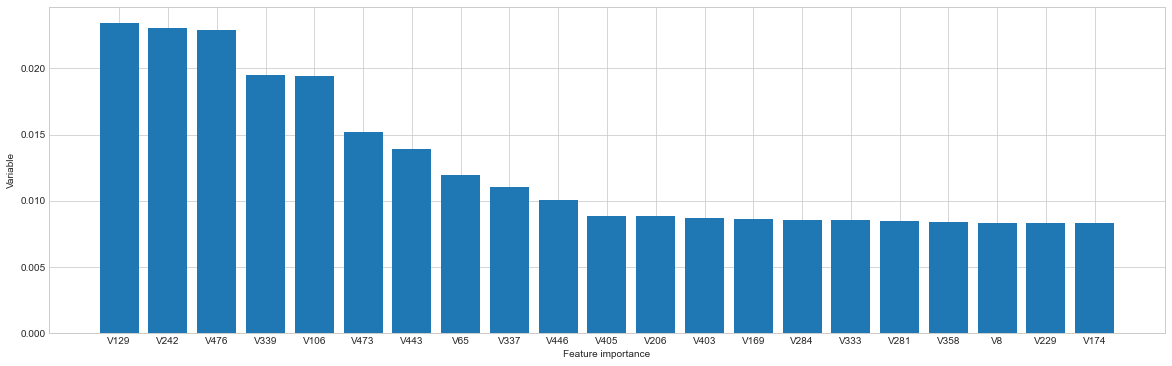

In [7]:
figure(figsize=(20, 6))
plt.bar(x = MCFS_importance.index, height = MCFS_importance['MCFS_importance'])
plt.ylabel('Variable')
plt.xlabel('Feature importance')

plt.show()

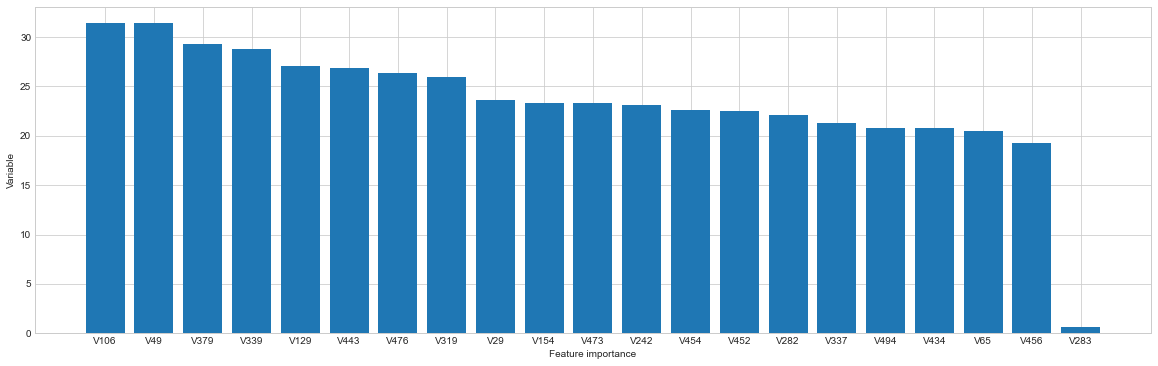

In [8]:
figure(figsize=(20, 6))
plt.bar(x = Boruta_importance.index, height = Boruta_importance['Boruta_importance'])
plt.ylabel('Variable')
plt.xlabel('Feature importance')

plt.show()

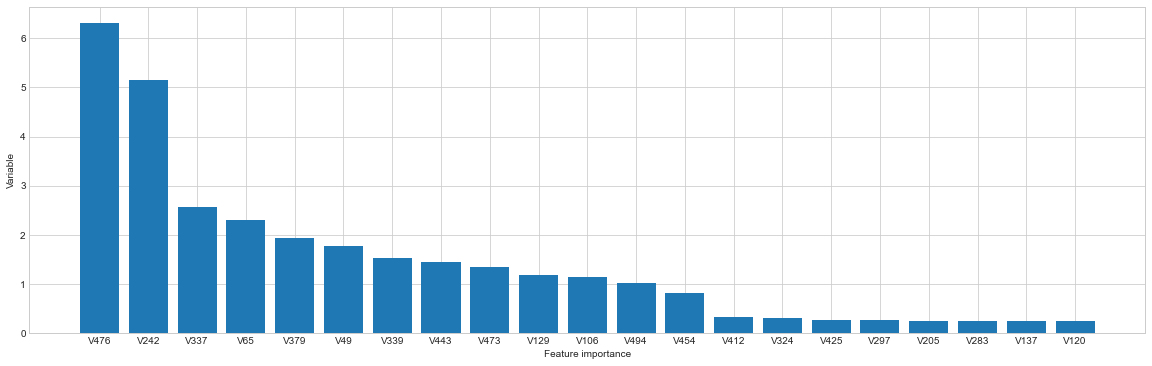

In [9]:
figure(figsize=(20, 6))
plt.bar(x = Univariate_selection.index, height = Univariate_selection['Univariate_selection'])
plt.ylabel('Variable')
plt.xlabel('Feature importance')

plt.show()

In [10]:
tmp = MCFS_importance.iloc[:10].join(Boruta_importance[:10], how = 'outer')
tmp = tmp.join(RF_importance[:10], how='outer')
tmp = tmp.join(Univariate_selection[:10], how='outer')
tmp = tmp[['order_MCFS', 'order_Boruta', 'order_RF_importance', 'order_Univariate']]

In [11]:
tmp.columns = ['MCFS', 'Boruta', 'Random Forest', 'Univariate']

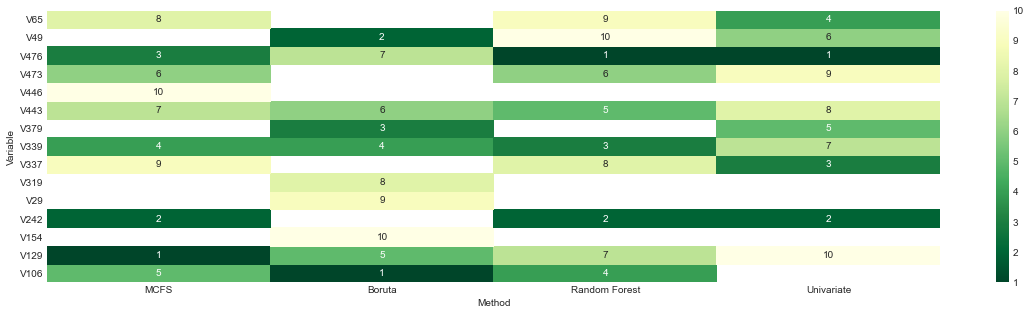

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(tmp, cmap=cm.YlGn_r, annot = True)
ax.set(xlabel = "Method", ylabel = "Variable")
ax.invert_yaxis()
plt.show()